In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/SOL-USD.csv')

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,715.000000,715.000000,715.000000,715.000000,715.000000,7.150000e+02
mean,54.051012,56.774647,51.320087,54.153403,54.153403,1.060786e+09
std,69.460225,72.374773,66.161465,69.384202,69.384202,1.668713e+09
min,0.513391,0.559759,0.505194,0.515273,0.515273,6.520200e+05
25%,2.030308,2.204544,1.909757,2.037599,2.037599,1.199775e+07
50%,19.415682,20.869474,18.891403,19.810223,19.810223,2.611757e+08
75%,91.939106,96.126831,88.567947,92.328099,92.328099,1.821714e+09
max,258.781555,260.062103,246.122421,258.934326,258.934326,1.706864e+10


<Axes: title={'center': 'Solana Open and Close Prices Over Time'}, xlabel='Date'>

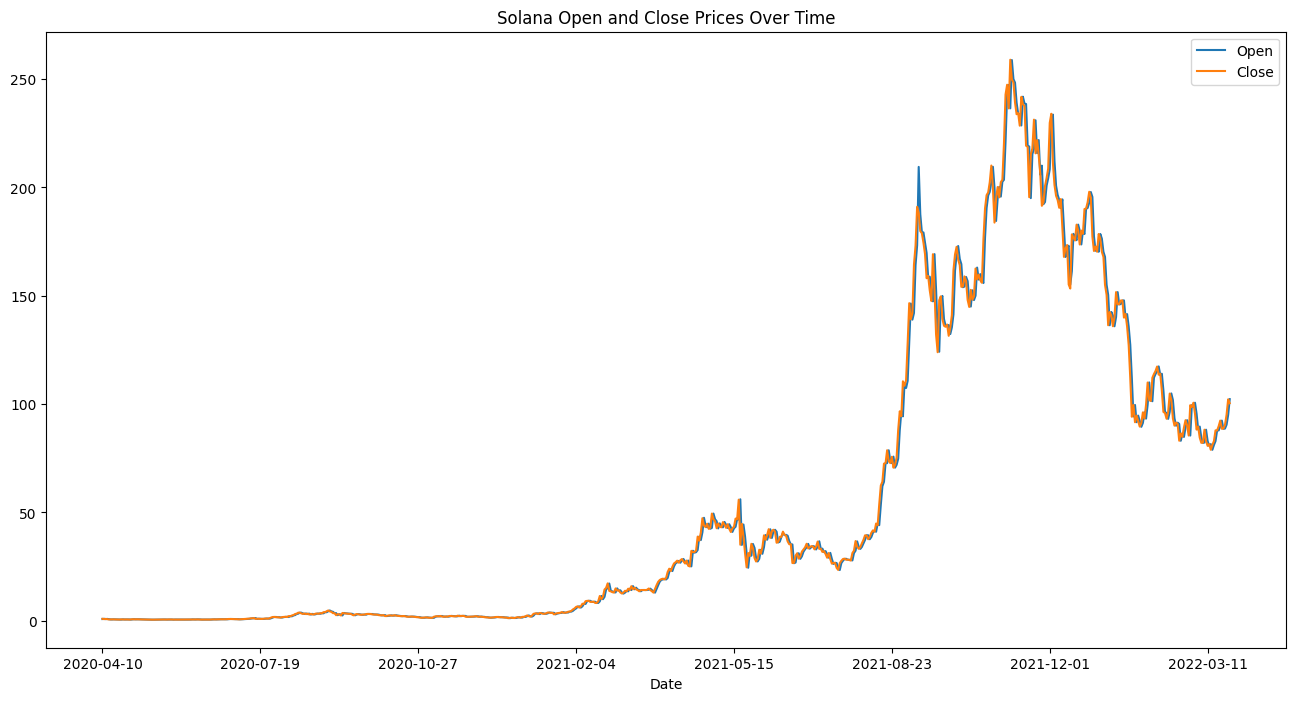

In [4]:
data.plot(x="Date", y=["Open", "Close"], figsize=(16, 8), title="Solana Open and Close Prices Over Time")

/var/folders/9_/cxynv32s76j7149cjtj1mjh00000gn/T/ipykernel_8918/3977768398.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data["Open"], data["Close"]], labels=["Open", "Close"])


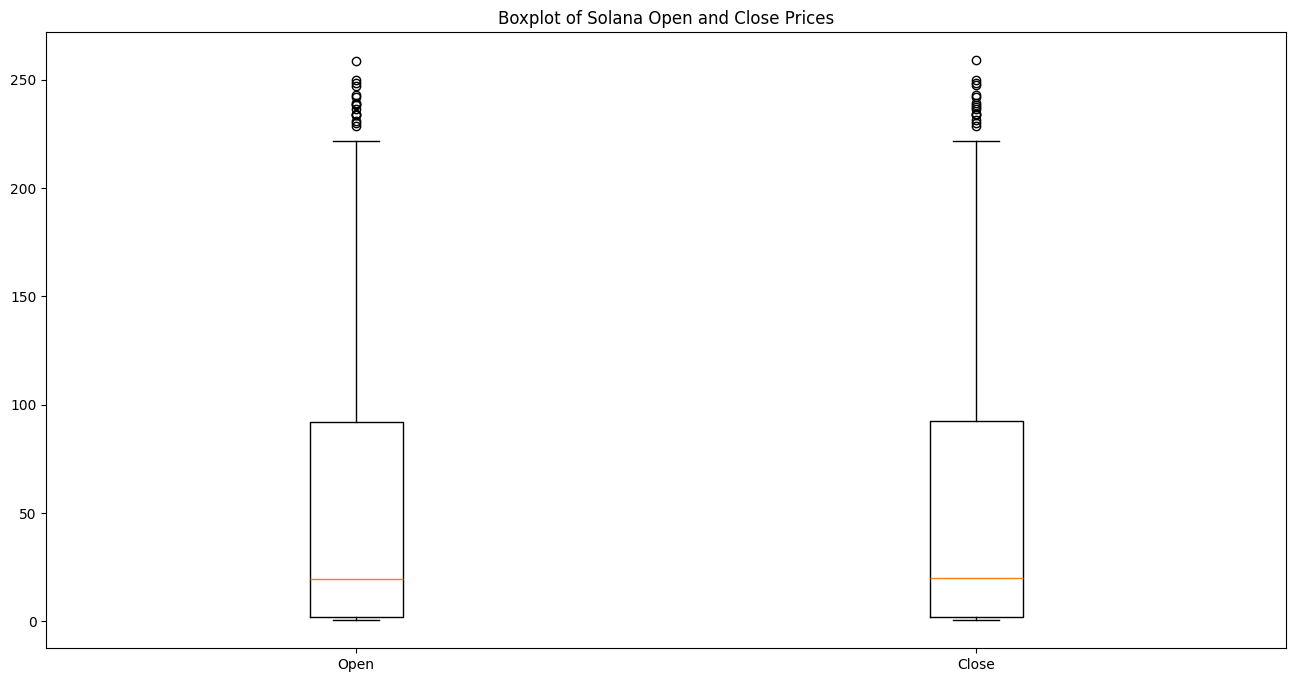

In [5]:
plt.figure(figsize=(16, 8))
plt.boxplot([data["Open"], data["Close"]], labels=["Open", "Close"])
plt.title("Boxplot of Solana Open and Close Prices")
plt.show()

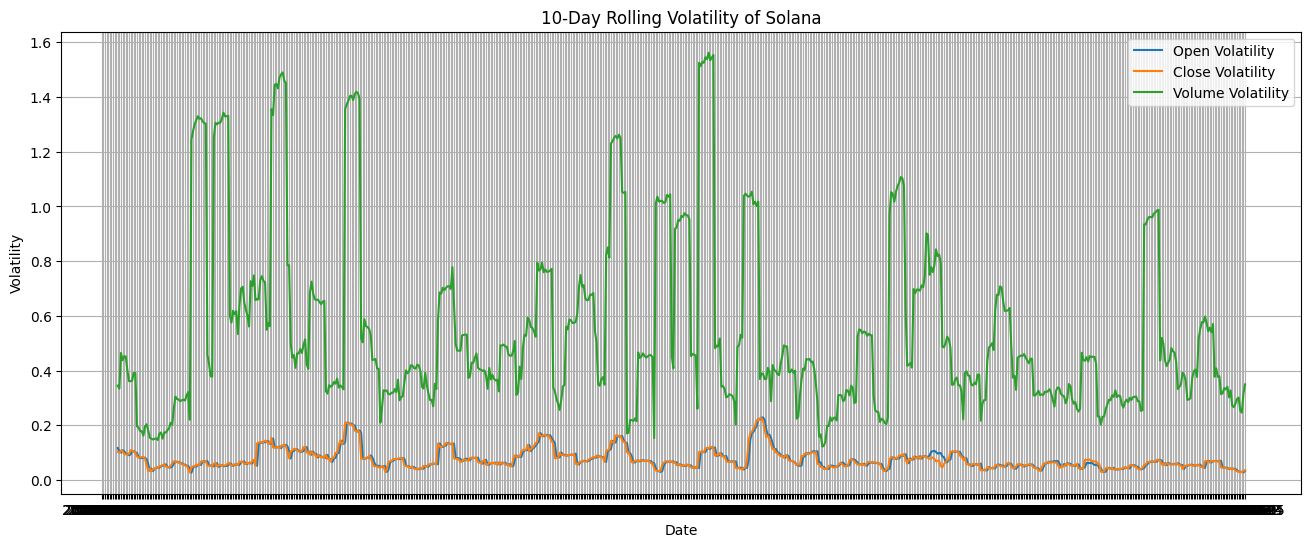

In [6]:
data["Return_Open"] = data["Open"].pct_change()
data["Return_Close"] = data["Close"].pct_change()
data["Return Volume"] = data["Volume"].pct_change()

rolling_window = 10
data["Vol_Open"] = data["Return_Open"].rolling(rolling_window).std()
data["Vol_Close"] = data["Return_Close"].rolling(rolling_window).std()
data["Vol_Volume"] = data["Return Volume"].rolling(rolling_window).std()

plt.figure(figsize=(16, 6))
plt.plot(data["Date"], data["Vol_Open"], label="Open Volatility")
plt.plot(data["Date"], data["Vol_Close"], label="Close Volatility")
plt.plot(data["Date"], data["Vol_Volume"], label="Volume Volatility")
plt.title(f"{rolling_window}-Day Rolling Volatility of Solana")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()